# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [203]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [204]:
employee = pd.read_csv("Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [205]:
#Mean Salary by Department - groupby

employee.groupby(['Department']).agg({'Salary':'mean'}).reset_index()


,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [206]:
#Mean Salary by Department - pivot table

salary_by_department = employee[['Department', 'Salary']]
salary_pivot = salary_by_department.pivot_table(index='Department', aggfunc='mean')
salary_pivot

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [207]:
pd.pivot_table(data=employee,
              index='Department',
              values='Salary',
              columns='Title',
              aggfunc='mean').reset_index()

Title,Department,VP,analyst,associate
0,HR,70.0,32.5,NaN
1,IT,70.0,32.5,60.0
2,Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [208]:
pd.pivot_table(data=employee,
              index='Department',
              values=['Salary', 'Years'],
              columns='Title',
              aggfunc='mean').reset_index()

Department Salary                   Years                  
Title                VP analyst associate    VP analyst associate
0             HR   70.0    32.5       NaN   8.0     3.0       NaN
1             IT   70.0    32.5      60.0   8.0     1.5       7.0
2          Sales    NaN     NaN      55.0   NaN     NaN       2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [209]:
pd.pivot_table(data=employee,
              index='Department',
              values='Salary',
              columns='Title',
              aggfunc=['mean', 'count']).reset_index().rename(columns={'mean':'avg_salary', 'count':'number_employees'})

Department avg_salary                   number_employees          \
Title                    VP analyst associate               VP analyst   
0             HR       70.0    32.5       NaN              1.0     2.0   
1             IT       70.0    32.5      60.0              1.0     2.0   
2          Sales        NaN     NaN      55.0              NaN     NaN   

                 
Title associate  
0           NaN  
1           1.0  
2           2.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [210]:
employee.groupby(['Department', 'Title']).agg({'Salary': ['median', 'min', 'max', 'std']})



Salary                  
                     median min max       std
Department Title                             
HR         VP          70.0  70  70       NaN
           analyst     32.5  30  35  3.535534
IT         VP          70.0  70  70       NaN
           analyst     32.5  30  35  3.535534
           associate   60.0  60  60       NaN
Sales      associate   55.0  55  55  0.000000

In [99]:
#Only 1 VP in HR and IT and 1 associate in IT
#There is no variation between median, max and min

#### Based on your comments, fill the missing values with an appropriate value.

In [211]:
#Fill Null with 0
employee.groupby(['Department', 'Title']).agg({'Salary': ['median', 'min', 'max', 'std']}).reset_index().fillna(0)


Department      Title Salary                  
                        median min max       std
0         HR         VP   70.0  70  70  0.000000
1         HR    analyst   32.5  30  35  3.535534
2         IT         VP   70.0  70  70  0.000000
3         IT    analyst   32.5  30  35  3.535534
4         IT  associate   60.0  60  60  0.000000
5      Sales  associate   55.0  55  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [212]:
department_summary = employee.groupby('Department').agg(
    NumEmployees=('Title', 'count'),  # Count the number of employees in each department
    TotalSalary=('Salary', 'sum')     # Calculate the total salary expenditure for each department
).reset_index()

department_summary

,Department,NumEmployees,TotalSalary
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [213]:
employee.groupby(['Department', 'Title']).agg({'Years':'sum', 'Salary':'mean'})

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [214]:
experience_salary_summary = employee.groupby(['Department', 'Title']).agg(
    TotalExperience=('Years', 'sum'),  # Calculate total years of work experience
    MeanSalary=('Salary', 'mean')                      # Calculate mean salary
).reset_index()
experience_salary_summary

,Department,Title,TotalExperience,MeanSalary
0,HR,VP,8,70.0
1,HR,analyst,6,32.5
2,IT,VP,8,70.0
3,IT,analyst,3,32.5
4,IT,associate,7,60.0
5,Sales,associate,5,55.0


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [215]:
fitbit = pd.read_csv("Fitbit.csv")
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [216]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [217]:
fitbit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [218]:
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

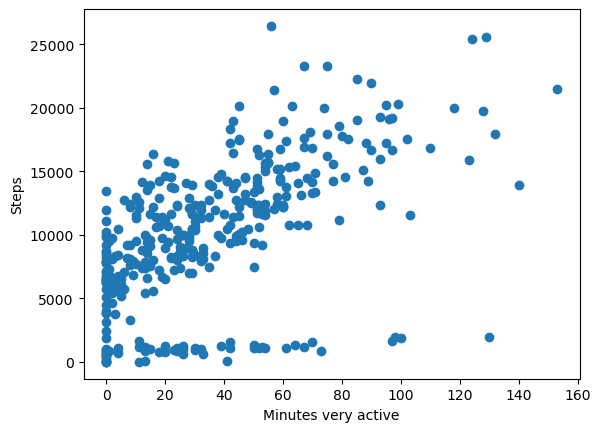

In [219]:
import matplotlib.pyplot as plt
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below


There is a correlation between the variables "Minutes Very Active" and "Steps." 
The correlation coefficient is a numerical measure that indicates the strength and direction of a linear relationship between two variables. 
In this case, the correlation coefficient of 0.571452 suggests a moderate positive correlation between the two variables.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [220]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

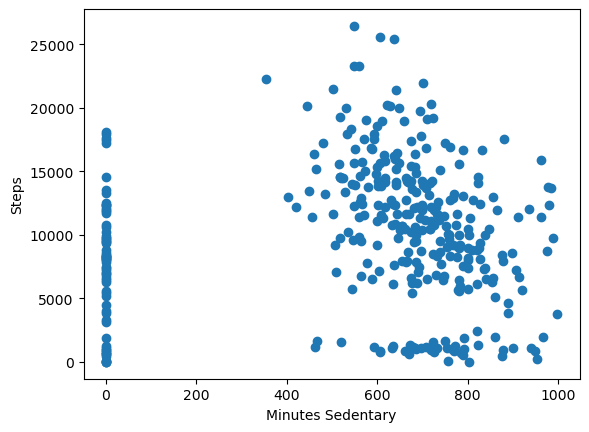

In [221]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

The correlation coefficient between "Minutes Sedentary" and "Steps" is approximately 0.076906. This value is quite close to zero, indicating a very weak linear relationship between these two variables. In other words, there is little to no linear correlation between the amount of time someone spends sedentary and the number of steps they take.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [222]:
fitbit[['MinutesOfSleep', 'Steps']].corr()


,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

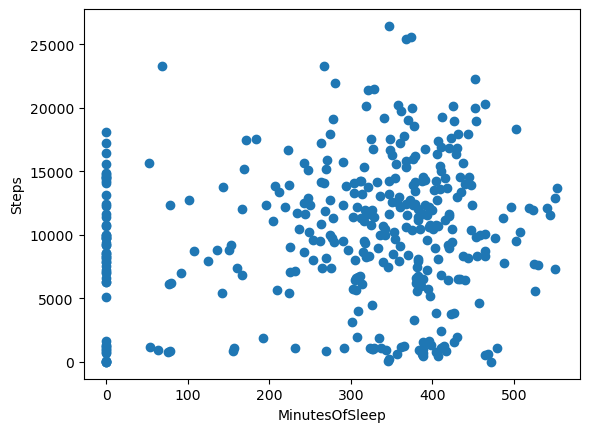

In [223]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()


The correlation coefficient between "MinutesOfSleep" and "Steps" is approximately 0.130986. This value indicates a weak positive linear relationship between the two variables. There is no clear correlation between the two variables

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [224]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()
cor_fit


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [225]:
cor_fit['Steps'].sort_values(ascending=False)


Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [226]:
time_grades = pd.read_csv("Time_Grades.csv")
time_grades.head(3)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9


#### Show visually the frequency distribution of the time_grades dataset.

C:\Users\USER\AppData\Local\Temp\ipykernel_10872\1370428752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_grades['Study time'])


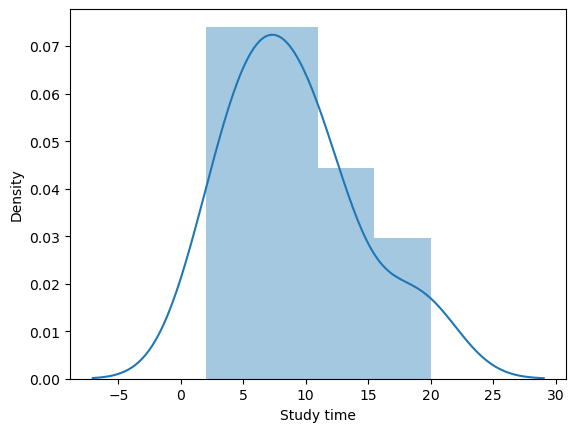

In [227]:
sns.distplot(time_grades['Study time'])
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_10872\3567967152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_grades['Grade'])


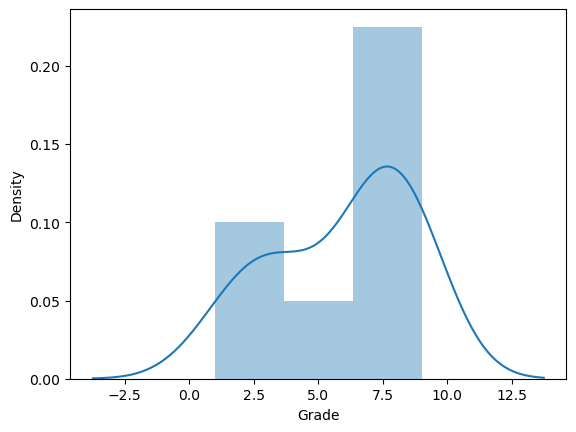

In [228]:
sns.distplot(time_grades['Grade'])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [229]:
pearson_corr, _ = stats.pearsonr(time_grades['Study time'], time_grades['Grade'])
spearman_corr, _ = stats.spearmanr(time_grades['Study time'], time_grades['Grade'])

print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)


Pearson Correlation: 0.7980456073578857
Spearman Correlation: 0.819658753036942


Both the Pearson and Spearman correlation coefficients indicate a relatively strong positive relationship between "Study time" and "Grade".
A Pearson correlation coefficient of approximately 0.798 suggests a strong positive linear relationship between the two variables. This indicates that as the study time increases, the grade tends to increase as well (might be other factors influencing the relationship that the Pearson correlation doesn't capture)
A Spearman correlation coefficient of approximately 0.820 also indicates a strong positive monotonic relationship between the variables. The Spearman correlation is more robust to detecting non-linear relationships and is appropriate when the relationship is not strictly linear.


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

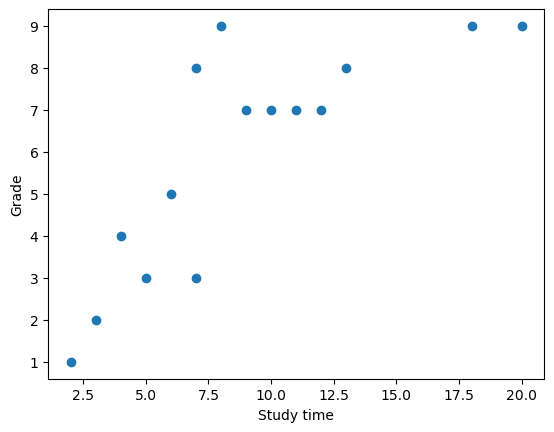

In [230]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson and Spearman correlations are both measures of the strength and direction of the relationship between two variables, but they are based on different principles and are suited for different types of data and relationships.
 While Pearson correlation focuses on quantifying linear relationships between continuous variables, Spearman correlation is more flexible and captures any type of consistent trend between variables, even if the relationship is not strictly linear. Choosing between them depends on the nature of the data and the specific research question.
